# <center> Weekly Fuel Price
---
---

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

In [2]:
#Import dataset
data = pd.read_excel('Weekly Fuel Prices.xlsx', parse_dates=True)

In [3]:
data.head()

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376


In [4]:
#Slice dataset
data = data[['Date', 'Petrol (USD)', 'Diesel (USD)']]
data.head()

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376


In [5]:
#data tail
data.tail()

,Date,Petrol (USD),Diesel (USD)
878,2020-04-06 00:00:00,110.234797,116.833354
879,2020-04-13 00:00:00,109.265819,116.150812
880,2020-04-20 00:00:00,108.632747,115.732573
881,NaN,NaN,NaN
882,Return to Contents page,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          882 non-null    object 
 1   Petrol (USD)  881 non-null    float64
 2   Diesel (USD)  881 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.8+ KB


In [7]:
#Drop null value from dataset
data.dropna(inplace=True)

In [8]:
#Date format for Date column
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
#Set index dataset
data.set_index('Date', inplace=True)

In [10]:
data.head()

,Petrol (USD),Diesel (USD)
Date,,
2003-06-09,74.590284,76.773394
2003-06-16,74.469143,76.689054
2003-06-23,74.423566,76.620546
2003-06-30,74.352421,76.505260
2003-07-07,74.283737,76.457376


In [11]:
df = data.copy()

In [12]:
#Day name for each index
df.index[2].strftime('%A')

'Monday'

Data set has weekly frequency each monday 

In [13]:
#set frequency to weekly frequency (Mondays) 'W-MON'
df = df.asfreq('W-MON')

In [14]:
df.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20'],
              dtype='datetime64[ns]', name='Date', length=881, freq='W-MON')

In [15]:
null_df = df[df['Petrol (USD)'].isnull()]
null_df

,Petrol (USD),Diesel (USD)
Date,,
2003-08-25,NaN,NaN
2004-05-03,NaN,NaN
2004-08-30,NaN,NaN
2006-04-17,NaN,NaN
2007-04-09,NaN,NaN
2013-08-26,NaN,NaN


In [16]:
null_df.index

DatetimeIndex(['2003-08-25', '2004-05-03', '2004-08-30', '2006-04-17',
               '2007-04-09', '2013-08-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

Null value because on '2003-08-25', '2004-05-03', '2004-08-30', '2006-04-17', and '2007-04-09', '2013-08-26' not stored on monday in the original dataset, but sunday.

In [17]:
#store df weekly frequency index
ind = df.index
ind

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20'],
              dtype='datetime64[ns]', name='Date', length=881, freq='W-MON')

In [18]:
#Reset and drop index
df = data.reset_index()
df = df.drop('Date',axis=1)
df

,Petrol (USD),Diesel (USD)
0,74.590284,76.773394
1,74.469143,76.689054
2,74.423566,76.620546
3,74.352421,76.505260
4,74.283737,76.457376
...,...,...
876,119.644504,123.409485
877,112.452709,118.597998
878,110.234797,116.833354
879,109.265819,116.150812


In [19]:
#insert weekly frequency as Date column
df['Date'] = ind
df

,Petrol (USD),Diesel (USD),Date
0,74.590284,76.773394,2003-06-09
1,74.469143,76.689054,2003-06-16
2,74.423566,76.620546,2003-06-23
3,74.352421,76.505260,2003-06-30
4,74.283737,76.457376,2003-07-07
...,...,...,...
876,119.644504,123.409485,2020-03-23
877,112.452709,118.597998,2020-03-30
878,110.234797,116.833354,2020-04-06
879,109.265819,116.150812,2020-04-13


In [20]:
#Year column
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [21]:
df.set_index('Date', inplace=True)

In [22]:
df.asfreq('W-MON')

,Petrol (USD),Diesel (USD),Year
Date,,,
2003-06-09,74.590284,76.773394,2003
2003-06-16,74.469143,76.689054,2003
2003-06-23,74.423566,76.620546,2003
2003-06-30,74.352421,76.505260,2003
2003-07-07,74.283737,76.457376,2003
...,...,...,...
2020-03-23,119.644504,123.409485,2020
2020-03-30,112.452709,118.597998,2020
2020-04-06,110.234797,116.833354,2020


In [23]:
df[df['Petrol (USD)'].isnull()]

,Petrol (USD),Diesel (USD),Year
Date,,,


In [24]:
df.isnull().sum()

Petrol (USD)    0
Diesel (USD)    0
Year            0
dtype: int64

In [25]:
df.head()

,Petrol (USD),Diesel (USD),Year
Date,,,
2003-06-09,74.590284,76.773394,2003
2003-06-16,74.469143,76.689054,2003
2003-06-23,74.423566,76.620546,2003
2003-06-30,74.352421,76.505260,2003
2003-07-07,74.283737,76.457376,2003


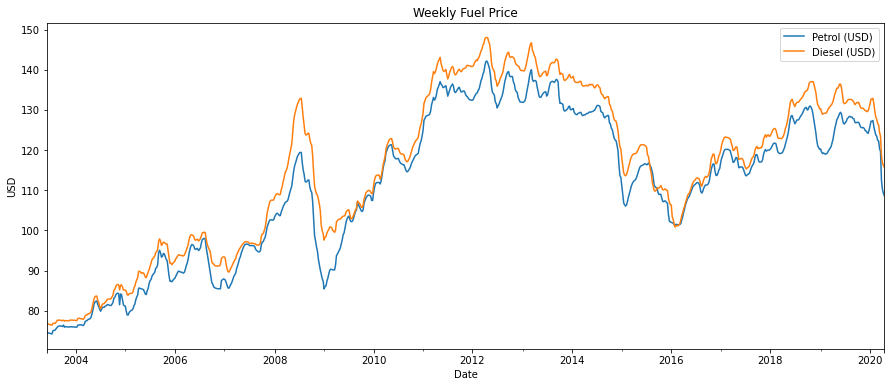

In [26]:
#PLot Petrol and Diesel
title = 'Weekly Fuel Price'
ylabel='USD'
xlabel=''

ax = df['Petrol (USD)'].plot(figsize=(15,6),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Diesel (USD)'].plot(legend=True);

In [27]:
df[['Petrol (USD)', 'Diesel (USD)']].describe()

,Petrol (USD),Diesel (USD)
count,881.000000,881.000000
mean,111.107355,115.614675
std,18.588151,19.715905
min,74.206577,76.408120
25%,95.306029,98.513787
50%,114.782386,118.597998
75%,127.924651,132.872053
max,142.172754,148.037710


## Petrol Forecast

In [28]:
#copy data
df_petrol = df['Petrol (USD)']

#create new dataframe
df_petrol = pd.DataFrame(df_petrol, columns=['Petrol (USD)'])

#Create MA3 and MA9
df_petrol['MA3'] = df_petrol['Petrol (USD)'].shift(1).rolling(window=3).mean()
df_petrol['MA9']= df_petrol['Petrol (USD)'].shift(1).rolling(window=9).mean()

df_petrol.head()

,Petrol (USD),MA3,MA9
Date,,,
2003-06-09,74.590284,NaN,NaN
2003-06-16,74.469143,NaN,NaN
2003-06-23,74.423566,NaN,NaN
2003-06-30,74.352421,74.494331,NaN
2003-07-07,74.283737,74.415043,NaN


In [29]:
#drop null value
df_petrol.dropna(inplace=True)

In [30]:
#Dependent variable
X = df_petrol[['MA3','MA9']]
X.head()

,MA3,MA9
Date,,
2003-08-11,75.096826,74.624023
2003-08-18,75.223252,74.718938
2003-08-25,75.459283,74.867805
2003-09-01,75.768825,75.048854
2003-09-08,75.995940,75.245903


In [31]:
#independent variable
y = df_petrol['Petrol (USD)']
y.head()

Date
2003-08-11    75.444516
2003-08-18    75.808948
2003-08-25    76.053011
2003-09-01    76.125860
2003-09-08    76.226190
Name: Petrol (USD), dtype: float64

In [32]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

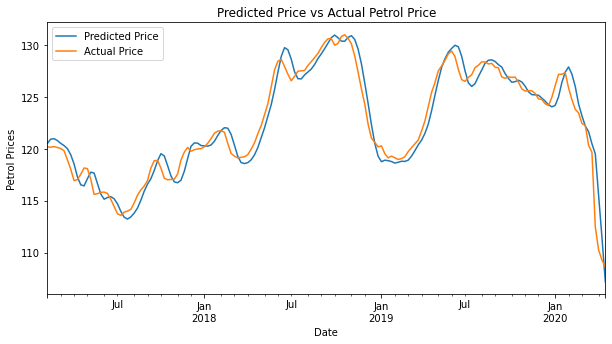

In [33]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel('Petrol Prices')
plt.title('Predicted Price vs Actual Petrol Price')
plt.show()

In [34]:
# Computing the accuracy of our model
R_squared_score = model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 93.75% accuracy.


In [35]:
#metrics function
def eval_test(var1,var2): 
    
    mse = mean_squared_error(var1, var2) #mean square error
    rmse = np.sqrt(mse) #root mean square error
    mae = mean_absolute_error(var1, var2) #mean absolute error
    mape = mean_absolute_percentage_error(var1, var2) #mean absolute percentage error
    
    print(f'Mean Square Error \t: {mse:5.6}')
    print(f'Root Mean Square Error \t: {rmse:5.6}')
    print(f'Mean Absolute Error \t: {mae:5.6}')
    print(f'MAPE \t\t\t: {mape:5.6}')

In [36]:
#evaluation for model
eval_test(y_test, predicted_price)

Mean Square Error 	: 1.58615
Root Mean Square Error 	: 1.25942
Mean Absolute Error 	: 0.932103
MAPE 			: 0.00768264


In [37]:
value3 = df_petrol[-3:]['Petrol (USD)'] #the last 3 fuel price
value3.reset_index(drop=True, inplace=True) #reset index


for i in range(3,6):
    mean3 = value3[-3:].mean()
    value3.loc[i] = mean3


value9 = df_petrol[-9:]['Petrol (USD)'] #the last 9 fuel price
value9.reset_index(drop=True, inplace=True)#reset index

#calculate MA9 for next 3 period
for i in range(9,12):
    mean9 = value9[-9:].mean()
    value9.loc[i] = mean9

In [38]:
value3

0    110.234797
1    109.265819
2    108.632747
3    109.377788
4    109.092118
5    109.034218
Name: Petrol (USD), dtype: float64

In [39]:
value9

0     123.446449
1     122.431272
2     122.243981
3     120.328169
4     119.644504
5     112.452709
6     110.234797
7     109.265819
8     108.632747
9     116.520050
10    115.750450
11    115.008136
Name: Petrol (USD), dtype: float64

In [40]:
#collect the last 3 value as MA3 and MA9 forecast result
MA_predict = pd.DataFrame([value3[-3:].reset_index(drop=True), value9[-3:].reset_index(drop=True)]).T
MA_predict.columns = ['MA3 Predict', 'MA9 Predict']

ts = pd.date_range('2020-04-20', periods=4, freq='W-Mon')[-3:] #date for 3 period

MA_predict.set_index(ts, inplace=True) #set period as index

forecast_price = model.predict(MA_predict) #predict the future value
MA_predict['Petrol Forecast'] = forecast_price

MA_predict

,MA3 Predict,MA9 Predict,Petrol Forecast
2020-04-27,109.377788,116.520050,106.100991
2020-05-04,109.092118,115.750450,106.041839
2020-05-11,109.034218,115.008136,106.301997


## Diesel Forecast

In [42]:
df_diesel = df['Diesel (USD)'] #copy data
df_diesel = pd.DataFrame(df_diesel, columns=['Diesel (USD)']) #create new dataframe

#Create MA3 and MA9
df_diesel['MA3'] = df_diesel['Diesel (USD)'].shift(1).rolling(window=3).mean()
df_diesel['MA9']= df_diesel['Diesel (USD)'].shift(1).rolling(window=9).mean()

df_diesel.dropna(inplace=True) #drop null value
X = df_diesel[['MA3','MA9']] #Dependent variable
y = df_diesel['Diesel (USD)'] #independent variable

# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train) 

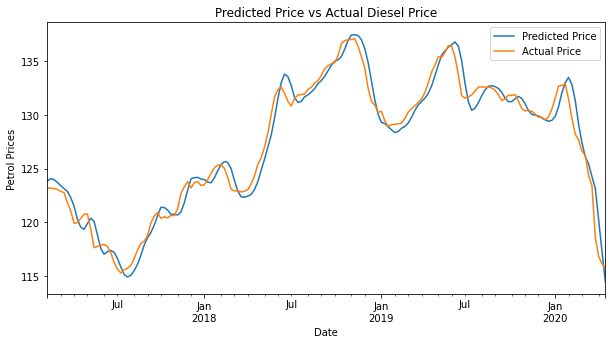

In [43]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel('Petrol Prices')
plt.title('Predicted Price vs Actual Diesel Price')
plt.show()

In [44]:
# Computing the accuracy of our model
R_squared_score = model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 96.50% accuracy.


In [45]:
#evaluation for model
eval_test(y_test, predicted_price)

Mean Square Error 	: 1.29094
Root Mean Square Error 	: 1.1362
Mean Absolute Error 	: 0.872539
MAPE 			: 0.00689611


In [46]:
value3 = df_diesel[-3:]['Diesel (USD)'] #the last 3 fuel price
value3.reset_index(drop=True, inplace=True) #reset index

#calculate MA3 for next 3 period
for i in range(3,6):
    mean3 = value3[-3:].mean()
    value3.loc[i] = mean3


value9 = df_diesel[-9:]['Diesel (USD)'] #the last 9 fuel price
value9.reset_index(drop=True, inplace=True)#reset index

#calculate MA9 for next 3 period
for i in range(9,12):
    mean9 = value9[-9:].mean()
    value9.loc[i] = mean9

In [47]:
#collect the last 3 value as MA3 and MA9 forecast result
MA_predict = pd.DataFrame([value3[-3:].reset_index(drop=True), value9[-3:].reset_index(drop=True)]).T
MA_predict.columns = ['MA3 Predict', 'MA9 Predict']

ts = pd.date_range('2020-04-20', periods=4, freq='W-Mon')[-3:] #date for 3 period

MA_predict.set_index(ts, inplace=True) #set period as index

forecast_price = model.predict(MA_predict) #predict the future value
MA_predict['Diesel Forecast'] = forecast_price

MA_predict

,MA3 Predict,MA9 Predict,Diesel Forecast
2020-04-27,116.238913,121.737470,113.714398
2020-05-04,116.040766,121.077809,113.731527
2020-05-11,116.004084,120.461736,113.963831
